In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()
pd.set_option("display.max_columns", None)

# Process with Grade data before proceeding

In [2]:
final = pd.read_csv("./final.csv")
matrik = pd.read_csv("./matrik.csv")
cam_cmr = pd.read_csv("./cam_smr_2018_Sem2.csv")

C:\Users\shahr\AppData\Local\Temp\ipykernel_12708\1432770105.py:3: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  cam_cmr = pd.read_csv("./cam_smr_2018_Sem2.csv")


In [115]:
# Check the outlier for grade, use grade to reverse calculate marks
cam_cmr[cam_cmr["Formatted agreed mark"] > 100]["high grade"].value_counts()

high grade
A     201
A-    170
B     159
B+    154
B-    142
C+     95
C      55
A+     27
C-      5
D+      1
F       1
Name: count, dtype: int64

In [116]:
avg_grade_marks = {
    "A+": 95,
    "A": 85,
    "A-": 77,
    "B+": 73,
    "B": 67,
    "B-": 63,
    "C+": 57,
    "C": 53,
    "C-": 47,
    "D+": 43,
    "D": 37,
    "F": 18
}
cam_cmr.loc[cam_cmr["Formatted agreed mark"] > 100, "Formatted agreed mark"] = cam_cmr[cam_cmr["Formatted agreed mark"] > 100]["high grade"].progress_apply(lambda x: avg_grade_marks[x])

100%|████████████████████████████████████████████████████████████████████████████████| 1010/1010 [00:00<00:00, 1620599.48it/s]


In [117]:
cam_cmr["Formatted agreed mark"].describe()

count    99212.000000
mean        67.984915
std         22.892081
min          0.000000
25%         64.500000
50%         74.570000
75%         81.300000
max        100.000000
Name: Formatted agreed mark, dtype: float64

In [118]:
# Combine two files(grade+matrik) into grade data
grade_df = cam_cmr.merge(matrik, left_on = "Student Candidate Number", right_on="NO_MATRIK")
print(grade_df.shape)

# Remove formatted agreed mark that is null value
grade_df = grade_df.dropna(subset=["Formatted agreed mark"])
grade_df

(109319, 99)


,SPR Code,Module code,Occurrence,Academic Year code,Period Slot code,Academic Year code.1,Start Period Slot code,Actual mark - DB field,Actual grade,Actual mark check digit,Agreed mark - DB field,Agreed grade,Agreed mark check digit,Credits Passed,Result of Module,Filler,Sortname,Formatted display Non-db,Formatted agreed mark,Current Attempt,Completed number,Initial SAS status,Process Status,Process status,Year of entry,Scheme code,Level code,Credit Value,Level rank,Mark Scheme code,Validating Body code,Student Candidate Number,Title,Number of periods,high mark,high grade,Re-take module,Registration type code,Module Selection Status,Calculated Mark,Formatted Display Non DB,Calculated Grade,Latest Mark,Formatted Display Non DB.1,Latest Grade,Final assess date,SCJ Code,SCE Sequence,Reason Failure,User Defined Field 02,User Defined Field 03,User Defined Field 04,User Defined Field 05,User Defined Field 06,User Defined Field 07,User Defined Field 08,User Defined Field 09,User Defined Field 10,User Defined Field 11,User Defined Field 12,User Defined Field 13,User Defined Field 14,User Defined Field 15,User Defined Field 16,User Defined Field 17,User Defined Field 18,User Defined Field 19,User Defined Field 20,Unscaled Mark,Unscaled Mark.1,Unscaled Grade,Scaling Status,First Attempt Mark,First Att. Mark,First Attempt Grade,Diet code,PDM Sequence,Percent taught celtic,Re-assessment Mode,MMR Check status,Skip Generation,Actual Grade Point,Actual Grade Pt,Agreed Grade Point,Agreed Grade Pt,Calculated Grade Point,Calc Grade Point,Latest Grade Point,Latest Grade Pt.,First Grade Point,First Grade Pt.,Unscaled Grade Point,Unscaled GradePt,Highest Grade Point,NO_MATRIK,NO_MATRIK_LAMA,SESI_MASUK,STATUS_PENGAJIAN,FAKULTI
0,17000016/2,AVA8002,1,2018,R2,2018.0,R2,0.0,CN,NaN,0.0,CN,NaN,0.0,P,NaN,A RAHMAN,0.0,0.0,1,1,A,COM,A,2018.0,UM,5,1,NaN,MPG003,NaN,17000016/2,NaN,NaN,0.0,CN,NaN,NaN,KT0,0.0,NaN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,CN,KRSAVACV001_2017_001,10.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,17000016/2,AVA170037,2017,LPT,A
1,17000187/3,LXHA8002,1,2018,R2,2018.0,R2,0.0,CN,NaN,0.0,CN,NaN,0.0,P,NaN,VEERIAH,0.0,0.0,1,1,A,COM,A,2018.0,UM,5,1,NaN,MPG003,NaN,17000187/3,NaN,NaN,0.0,CN,NaN,NaN,KT0,0.0,NaN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,CN,KRSLHACV001_2011_001,10.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,17000187/3,LHA140014,2014,AK,L
2,17000330/3,AOF7001,1,2018,R2,2018.0,R2,7500.0,A-,NaN,7500.0,A-,NaN,3.0,P,NaN,MOHD SAID,75.0,75.0,1,1,A,COM,A,2018.0,UM,4,3,NaN,MPG000,NaN,17000330/3,NaN,NaN,7500.0,A-,NaN,NaN,KT0,7500.0,NaN,A-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7500.0,NaN,A-,SMMAOFCV000_2017_001,10.0,NaN,NaN,NaN,NaN,370.0,NaN,370.0,NaN,370.0,NaN,NaN,NaN,370.0,NaN,NaN,NaN,370.0,17000330/3,AOF180019,2018,TDU,A
3,17000349/2,TXGX8002,1,2018,R2,2018.0,R2,0.0,CN,NaN,0.0,CN,NaN,0.0,P,NaN,MOHD DIN A,0.0,0.0,1,1,A,COM,A,2018.0,UM,5,1,NaN,MPG003,NaN,17000349/2,NaN,NaN,0.0,CN,NaN,NaN,KT0,0.0,NaN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,CN,KRSTHACV001_2011_001,10.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,17000349/2,THA160026,2016,AK,T
4,17000628/2,WQD7002,P2,2018,S2,2018.0,S2,8460.0,A,NaN,8460.0,A,NaN,10.0,P,NaN,TAN,84.6,84.6,1,1,A,COM,A,2018.0,UM,4,10,NaN,MPG000,NaN,17000628/2,NaN,NaN,8460.0,A,NaN,NaN,KT0,8460.0,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8460.0,NaN,A,SCWWQDCV000_2017_001,20.0,NaN,NaN,NaN,NaN,400.0,NaN,400.0,NaN,400.0,NaN,NaN,NaN,400.0,NaN,NaN,NaN,400.0,17000628/2,WQD170011,2017,GR,W
...,...,...,...,...,...,...,...,

In [119]:
# Get number of courses and marks from grade data
final_grade_df = grade_df.groupby("NO_MATRIK_LAMA").progress_apply(lambda x: pd.Series([x.shape[0], x["Formatted agreed mark"].sum()], index=["number_of_courses", "total_marks"])).reset_index()

100%|█████████████████████████████████████████████████████████████████████████████████| 22275/22275 [00:02<00:00, 9204.28it/s]


In [120]:
final_grade_df

,NO_MATRIK_LAMA,number_of_courses,total_marks
0,AEB150023,2.0,148.00
1,AEC150006,1.0,93.00
2,AEC150013,5.0,324.00
3,AEC150015,2.0,121.00
4,AEC150020,1.0,87.00
...,...,...,...
22270,ZQA180042,3.0,249.14
22271,ZQA180044,3.0,217.58
22272,ZQA180045,3.0,243.39
22273,ZQA180046,4.0,247.68


In [121]:
# Use student from final.csv as a start to merge with remaining data
final_grade_df2 = final[["userid", "idnumber"]].merge(final_grade_df, left_on="idnumber", right_on="NO_MATRIK_LAMA")

In [122]:
# Filter student log file to speed up time (From 36204348 reduced 12,243,876 to 23,922,462 rows)
student_log = pd.read_csv("./student_log.csv")
student_log["timecreated"] = pd.to_datetime(student_log["timecreated"], unit="s")
student_log = student_log[(student_log.timecreated >= pd.to_datetime("18-02-2019", format="%d-%m-%Y")) & (student_log.timecreated <= pd.to_datetime("30-06-2019", format="%d-%m-%Y"))].copy()

In [123]:
student_log.head(3)

,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,contextid,contextlevel,contextinstanceid,userid,courseid,relateduserid,anonymous,other,timecreated,origin,ip,realuserid
179,20125308,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,2,50,1,2583,1,NaN,0,N;,2019-03-10 08:18:36,web,192.168.90.44,NaN
180,20125378,\mod_forum\event\discussion_viewed,mod_forum,viewed,discussion,forum_discussions,13917.0,r,2,224388,70,100172,24773,4106,NaN,0,N;,2019-03-10 08:19:05,web,192.168.90.44,NaN
181,20125442,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,149506,50,3752,6473,3752,NaN,0,N;,2019-03-10 08:19:38,web,192.168.90.44,NaN


### Process student log

In [124]:
student_log["process_eventname"] = student_log["eventname"].str.split("\\").str[-1]
student_log2 = student_log[pd.notnull(student_log.objectid)].copy()
student_log3 = student_log[pd.isnull(student_log.objectid)].copy()

### Process total interaction

In [125]:
ttl_interaction_df = student_log2.groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"total_interaction"})
ttl_interaction_df.head(3)

100%|██████████████████████████████████████████████████████████████████████████████████| 19693/19693 [00:27<00:00, 706.50it/s]


,userid,total_interaction
0,64,1042
1,65,512
2,66,998


### Process student login

In [126]:
student_logins = student_log2[(student_log2.process_eventname == "user_loggedin")].copy()

In [127]:
student_logins = student_logins[["userid", "timecreated"]].copy()

In [128]:
# Count number of login in weekday/weekend
student_logins["weekday"] = student_logins["timecreated"].dt.weekday

In [129]:
# Count number of login in each time period
student_logins["hour"] = student_logins["timecreated"].dt.hour

In [130]:
def count_login(subset_df):
    ttl_login_cnt = len(subset_df)
    weekend_cnt = len(subset_df[subset_df["weekday"]>=5])
    weekday_cnt = len(subset_df[subset_df["weekday"]<=4])
    midnight_cnt = len(subset_df[(subset_df["hour"]<5)])
    early_morning_cnt = len(subset_df[(subset_df["hour"]>=5) & (subset_df["hour"]<=8)])
    late_morning_cnt = len(subset_df[(subset_df["hour"]>=9) & (subset_df["hour"]<12)])
    afternoon_cnt = len(subset_df[(subset_df["hour"]>=12) & (subset_df["hour"]<17)])
    evening_cnt = len(subset_df[(subset_df["hour"]>=17) & (subset_df["hour"]<21)])
    night_cnt = len(subset_df[(subset_df["hour"]>=21)])
    # holiday_cnt = len(subset_df[(((subset_df["timecreated"] >= pd.to_datetime("2019-01-21")) & (subset_df["timecreated"] <= pd.to_datetime("2019-02-17"))) | 
    #                              ((subset_df["timecreated"] >= pd.to_datetime("2019-07-01")) & (subset_df["timecreated"] <= pd.to_datetime("2019-09-08"))) | 
    #                              ((subset_df["timecreated"] >= pd.to_datetime("2020-01-20")) & (subset_df["timecreated"] <= pd.to_datetime("2020-02-16"))) | 
    #                              ((subset_df["timecreated"] >= pd.to_datetime("2020-06-29")) & (subset_df["timecreated"] <= pd.to_datetime("2020-09-13"))) | 
    #                              ((subset_df["timecreated"] >= pd.to_datetime("2021-02-15")) & (subset_df["timecreated"] <= pd.to_datetime("2021-03-07"))) | 
    #                              ((subset_df["timecreated"] >= pd.to_datetime("2021-07-19")) & (subset_df["timecreated"] <= pd.to_datetime("2021-10-03"))))])
    return pd.Series({"total_login": ttl_login_cnt, "weekend_login": weekend_cnt, "weekday_login": weekday_cnt,\
                      "midnight_login": midnight_cnt, "early_morning_login": early_morning_cnt,\
                      "late_morning_login":late_morning_cnt, "afternoon_login": afternoon_cnt,\
                      "evening_login": evening_cnt, "night_login": night_cnt}) #, "holiday_login": holiday_cnt})

In [131]:
final_login_df = student_logins.groupby("userid").progress_apply(count_login).reset_index()

100%|█████████████████████████████████████████████████████████████████████████████████| 19372/19372 [00:19<00:00, 1001.63it/s]


In [132]:
final_login_df.head(3)

,userid,total_login,weekend_login,weekday_login,midnight_login,early_morning_login,late_morning_login,afternoon_login,evening_login,night_login
0,64,168,24,144,43,33,32,41,10,9
1,65,88,5,83,29,15,14,25,2,3
2,66,147,24,123,63,31,12,38,1,2


#### COURSES

In [133]:
# Number of courses (NOT USED, USING NUMBER OF COURSES FROM GRADE DATA)
# course_df = student_log2[(student_log2.courseid != 0) & (student_log2.courseid != 1)].groupby("userid").progress_apply(lambda x: x["courseid"].nunique()).to_frame().reset_index().rename(columns={0:"no_of_courses"})
# course_df.head(3)

In [134]:
# Number of viewed course
viewed_course_df = student_log3[(student_log3.process_eventname == "course_viewed") & (student_log3.component == "core")].groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"no_of_viewed_courses"})
viewed_course_df.head(3)

100%|█████████████████████████████████████████████████████████████████████████████████| 19251/19251 [00:15<00:00, 1210.82it/s]


,userid,no_of_viewed_courses
0,64,1282
1,65,241
2,66,1508


#### ATTENDANCE

In [135]:
# Attendance
attendance_df = student_log2[(student_log2.process_eventname == "attendance_taken_by_student") & (student_log2.component == "mod_attendance")].groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"no_of_attendance_taken"})
attendance_df.head(3)

100%|██████████████████████████████████████████████████████████████████████████████████| 2040/2040 [00:00<00:00, 84531.67it/s]


,userid,no_of_attendance_taken
0,64,2
1,65,1
2,67,10


#### FILES

In [136]:
# Download all course slides
download_file_df = student_log2[(student_log2.process_eventname == "all_files_downloaded") & (student_log2.component == "mod_folder")].groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"no_of_all_files_downloaded"})
download_file_df.head(3)

100%|██████████████████████████████████████████████████████████████████████████████████| 4045/4045 [00:00<00:00, 65261.97it/s]


,userid,no_of_all_files_downloaded
0,64,1
1,65,1
2,68,9


#### ASSIGNMENTS

In [137]:
# Number of assignments
assignment_df = student_log2[(student_log2.component == "mod_assign") & (student_log2.action == "submitted")].groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"no_of_assignments"})
assignment_df.head(3)

100%|████████████████████████████████████████████████████████████████████████████████| 13676/13676 [00:00<00:00, 91367.15it/s]


,userid,no_of_assignments
0,64,16
1,65,11
2,66,29


#### FORUMS

In [138]:
# Number of forum post created
forum_df = student_log2[(student_log2.process_eventname == "discussion_created") & (student_log2.component == "mod_forum")].groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"no_of_forum_created"})
forum_df.head(3)

100%|██████████████████████████████████████████████████████████████████████████████████| 4885/4885 [00:00<00:00, 69053.62it/s]


,userid,no_of_forum_created
0,66,2
1,67,2
2,68,2


#### QUIZZES

In [139]:
# Number of quizes
quiz_df = student_log2[(student_log2.component == "mod_quiz") & (student_log2.process_eventname == "course_module_viewed")].groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"number_of_quizzes"})
quiz_df.head(3)

100%|████████████████████████████████████████████████████████████████████████████████| 11422/11422 [00:00<00:00, 73626.69it/s]


,userid,number_of_quizzes
0,64,17
1,65,9
2,66,3


In [140]:
# Quizes done
quiz_done_df = student_log2[(student_log2.component == "mod_quiz") & (student_log2.process_eventname == "attempt_submitted")].groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"no_of_quizzes_completed"})
quiz_done_df.head(3)

100%|████████████████████████████████████████████████████████████████████████████████| 10102/10102 [00:00<00:00, 79059.55it/s]


,userid,no_of_quizzes_completed
0,64,4
1,65,5
2,66,1


In [141]:
# Total attempt done for quizzes
quiz_attempt_df = student_log2[(student_log2.component == "mod_quiz") & (student_log2.process_eventname == "attempt_viewed")].groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"no_of_quizzes_attempt"})
quiz_attempt_df.head(3)

100%|████████████████████████████████████████████████████████████████████████████████| 10209/10209 [00:00<00:00, 37311.53it/s]


,userid,no_of_quizzes_attempt
0,64,8
1,65,11
2,66,1


In [142]:
# Quiz giveup flag
quiz_giveup_df = student_log2[(student_log2.component == "mod_quiz") & (student_log2.action.isin(["becameoverdue", "abandoned"]))].groupby("userid").progress_apply(lambda x: 1).to_frame().reset_index().rename(columns={0:"f_quizzes_giveup"})
quiz_giveup_df.head(3)

100%|████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:00<00:00, 72735.45it/s]


,userid,f_quizzes_giveup
0,1364,1
1,2073,1
2,2150,1


In [143]:
# Use grade as the main dataframe to be merged
test = final_grade_df2.merge(final_login_df, on="userid", how="left").merge(ttl_interaction_df, on="userid", how="left").merge(viewed_course_df, on="userid", how="left").merge(attendance_df, on="userid", how="left")\
    .merge(download_file_df, on="userid", how="left").merge(assignment_df, on="userid", how="left").merge(forum_df, on="userid", how="left").merge(quiz_df, on="userid", how="left")\
    .merge(quiz_done_df, on="userid", how="left").merge(quiz_attempt_df, on="userid", how="left").merge(quiz_giveup_df, on="userid", how="left")

In [144]:
# Fill NA
test = test.fillna(0)

In [145]:
# Standardize all column based on number of courses
def standard(x):
    result_list = {}
    result_list["userid"] = x["userid"].values[0]
    result_list["number_of_courses"] = x["number_of_courses"].values[0]
    for col in [x for x in x.columns if x not in ["userid", "number_of_courses", "f_quizzes_giveup", "idnumber", "NO_MATRIK_LAMA"]]:
        result_list[col] = x[col].values[0]/x["number_of_courses"].values[0]
    result_list["f_quizzes_giveup"] = x["f_quizzes_giveup"].values[0]
    return pd.Series(result_list)
final_df = test.groupby("userid", as_index=False).progress_apply(lambda x: standard(x))
final_df = pd.DataFrame(final_df)

100%|█████████████████████████████████████████████████████████████████████████████████| 18576/18576 [00:04<00:00, 4151.24it/s]


In [146]:
final_df.head()

,userid,number_of_courses,total_marks,total_login,weekend_login,weekday_login,midnight_login,early_morning_login,late_morning_login,afternoon_login,evening_login,night_login,total_interaction,no_of_viewed_courses,no_of_attendance_taken,no_of_all_files_downloaded,no_of_assignments,no_of_forum_created,number_of_quizzes,no_of_quizzes_completed,no_of_quizzes_attempt,f_quizzes_giveup
0,64.0,6.0,60.483333,28.000000,4.000000,24.000000,7.166667,5.500000,5.333333,6.833333,1.666667,1.500000,173.666667,213.666667,0.333333,0.166667,2.666667,0.000000,2.833333,0.666667,1.333333,0.0
1,65.0,6.0,53.650000,14.666667,0.833333,13.833333,4.833333,2.500000,2.333333,4.166667,0.333333,0.500000,85.333333,40.166667,0.166667,0.166667,1.833333,0.000000,1.500000,0.833333,1.833333,0.0
2,66.0,7.0,67.514286,21.000000,3.428571,17.571429,9.000000,4.428571,1.714286,5.428571,0.142857,0.285714,142.571429,215.428571,0.000000,0.000000,4.142857,0.285714,0.428571,0.142857,0.142857,0.0
3,67.0,6.0,71.566667,19.166667,2.500000,16.666667,6.333333,2.666667,1.666667,7.833333,0.333333,0.333333,131.000000,99.833333,1.666667,0.000000,6.000000,0.333333,0.000000,0.000000,0.000000,0.0
4,68.0,7.0,85.782857,29.000000,5.000000,24.000000,12.142857,5.571429,3.571429,7.000000,0.714286,0.000000,138.142857,137.285714,2.571429,1.285714,6.000000,0.285714,0.285714,0.000000,0.000000,0.0


In [147]:
final_df.describe()

,userid,number_of_courses,total_marks,total_login,weekend_login,weekday_login,midnight_login,early_morning_login,late_morning_login,afternoon_login,evening_login,night_login,total_interaction,no_of_viewed_courses,no_of_attendance_taken,no_of_all_files_downloaded,no_of_assignments,no_of_forum_created,number_of_quizzes,no_of_quizzes_completed,no_of_quizzes_attempt,f_quizzes_giveup
count,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000
mean,12398.887489,5.126292,65.048899,17.055369,3.053399,14.001970,5.105280,4.124610,2.286923,4.170923,0.797535,0.570098,89.396379,72.371191,0.146303,0.178280,1.239883,0.122413,1.649128,0.452069,5.256248,0.012059
std,6964.251996,2.488842,24.234167,16.682656,3.601409,13.663205,5.357546,4.346097,3.566116,4.313876,1.259286,1.132513,82.625162,78.026557,0.609187,1.257996,1.764696,0.463673,3.117543,0.903011,11.183277,0.109150
min,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6717.750000,3.000000,64.666667,5.428571,0.750000,4.375000,1.333333,1.000000,0.375000,1.111111,0.000000,0.000000,28.000000,19.160714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11795.500000,6.000000,73.000000,13.750000,2.200000,11.285714,3.857143,3.142857,1.333333,3.285714,0.375000,0.250000,73.267857,52.236111,0.000000,0.000000,0.600000,0.000000,0.285714,0.000000,0.000000,0.000000
75%,17145.250000,7.000000,78.571429,24.142857,4.250000,20.000000,7.333333,5.833333,2.800000,6.000000,1.000000,0.714286,129.129464,100.517857,0.000000,0.000000,1.666667,0.125000,2.000000,0.500000,5.428571,0.000000
max,28234.000000,11.000000,100.000000,366.000000,128.000000,238.000000,107.571429,88.000000,137.000000,96.000000,40.000000,79.000000,983.000000,1360.800000,14.000000,133.857143,21.000000,15.000000,49.285714,17.000000,174.000000,1.000000


### Add student info

In [148]:
# GENDER
def get_gender(name):
    if re.search("\sA/l\s", name, re.IGNORECASE):
        return "male"
    elif re.search("\sA/p\s", name, re.IGNORECASE):
        return "female"
    elif re.search(r"\sbin\s", name, re.IGNORECASE):
        return "male"
    elif re.search(r"\sbinti\s", name, re.IGNORECASE):
        return "female"
    elif re.search(r"\sb\s", name, re.IGNORECASE):
        return "male"
    elif re.search(r"\sbt\s", name, re.IGNORECASE):
        return "female"
    elif re.search(r"\sbinte\s", name, re.IGNORECASE):
        return "female"
    elif re.search(r"\sa\.l\s", name, re.IGNORECASE):
        return "male"
    elif re.search(r"\sa\.p\s", name, re.IGNORECASE):
        return "female"
    elif re.search(r"\sanak\s", name, re.IGNORECASE):
        return "male"
    elif re.search(r"\sal\s", name, re.IGNORECASE):
        return "male"
    elif re.search(r"\sA/ P\s", name, re.IGNORECASE):
        return "female"
    elif re.search(r"\ss/o\s", name, re.IGNORECASE):
        return "male"
    elif re.search(r"\sd/o\s", name, re.IGNORECASE):
        return "female"
    elif re.search(r"\sBte\s", name, re.IGNORECASE):
        return "female"
    else:
        return "unknown"
final["gender"] = final.firstname.progress_apply(lambda x: get_gender(x))

100%|███████████████████████████████████████████████████████████████████████████████| 24544/24544 [00:00<00:00, 235262.52it/s]


In [149]:
# YEAR INTAKE CALCULATE TIME OF STUDIES
matrik["year_studies"] = 2019 - matrik["SESI_MASUK"]

In [150]:
student_info_df = final[["userid", "idnumber", "gender"]].merge(matrik[["NO_MATRIK_LAMA", "year_studies"]], left_on="idnumber", right_on="NO_MATRIK_LAMA")

In [151]:
final_df = final_df.merge(student_info_df[["userid", "gender", "year_studies"]], on="userid", how="left")

In [152]:
final_df.to_csv("./final_df3.csv", index=False)

In [153]:
test.to_csv("./final_df_without_standardize.csv", index=False)

# EDA

In [154]:
final_df = pd.read_csv("./final_df3.csv")

In [155]:
final_df.number_of_courses.describe()

count    18582.000000
mean         5.125713
std          2.488706
min          1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max         11.000000
Name: number_of_courses, dtype: float64

/var/folders/lf/klp9hl2j0zd2ypllsb82rd9w0000gn/T/ipykernel_10370/2552962006.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


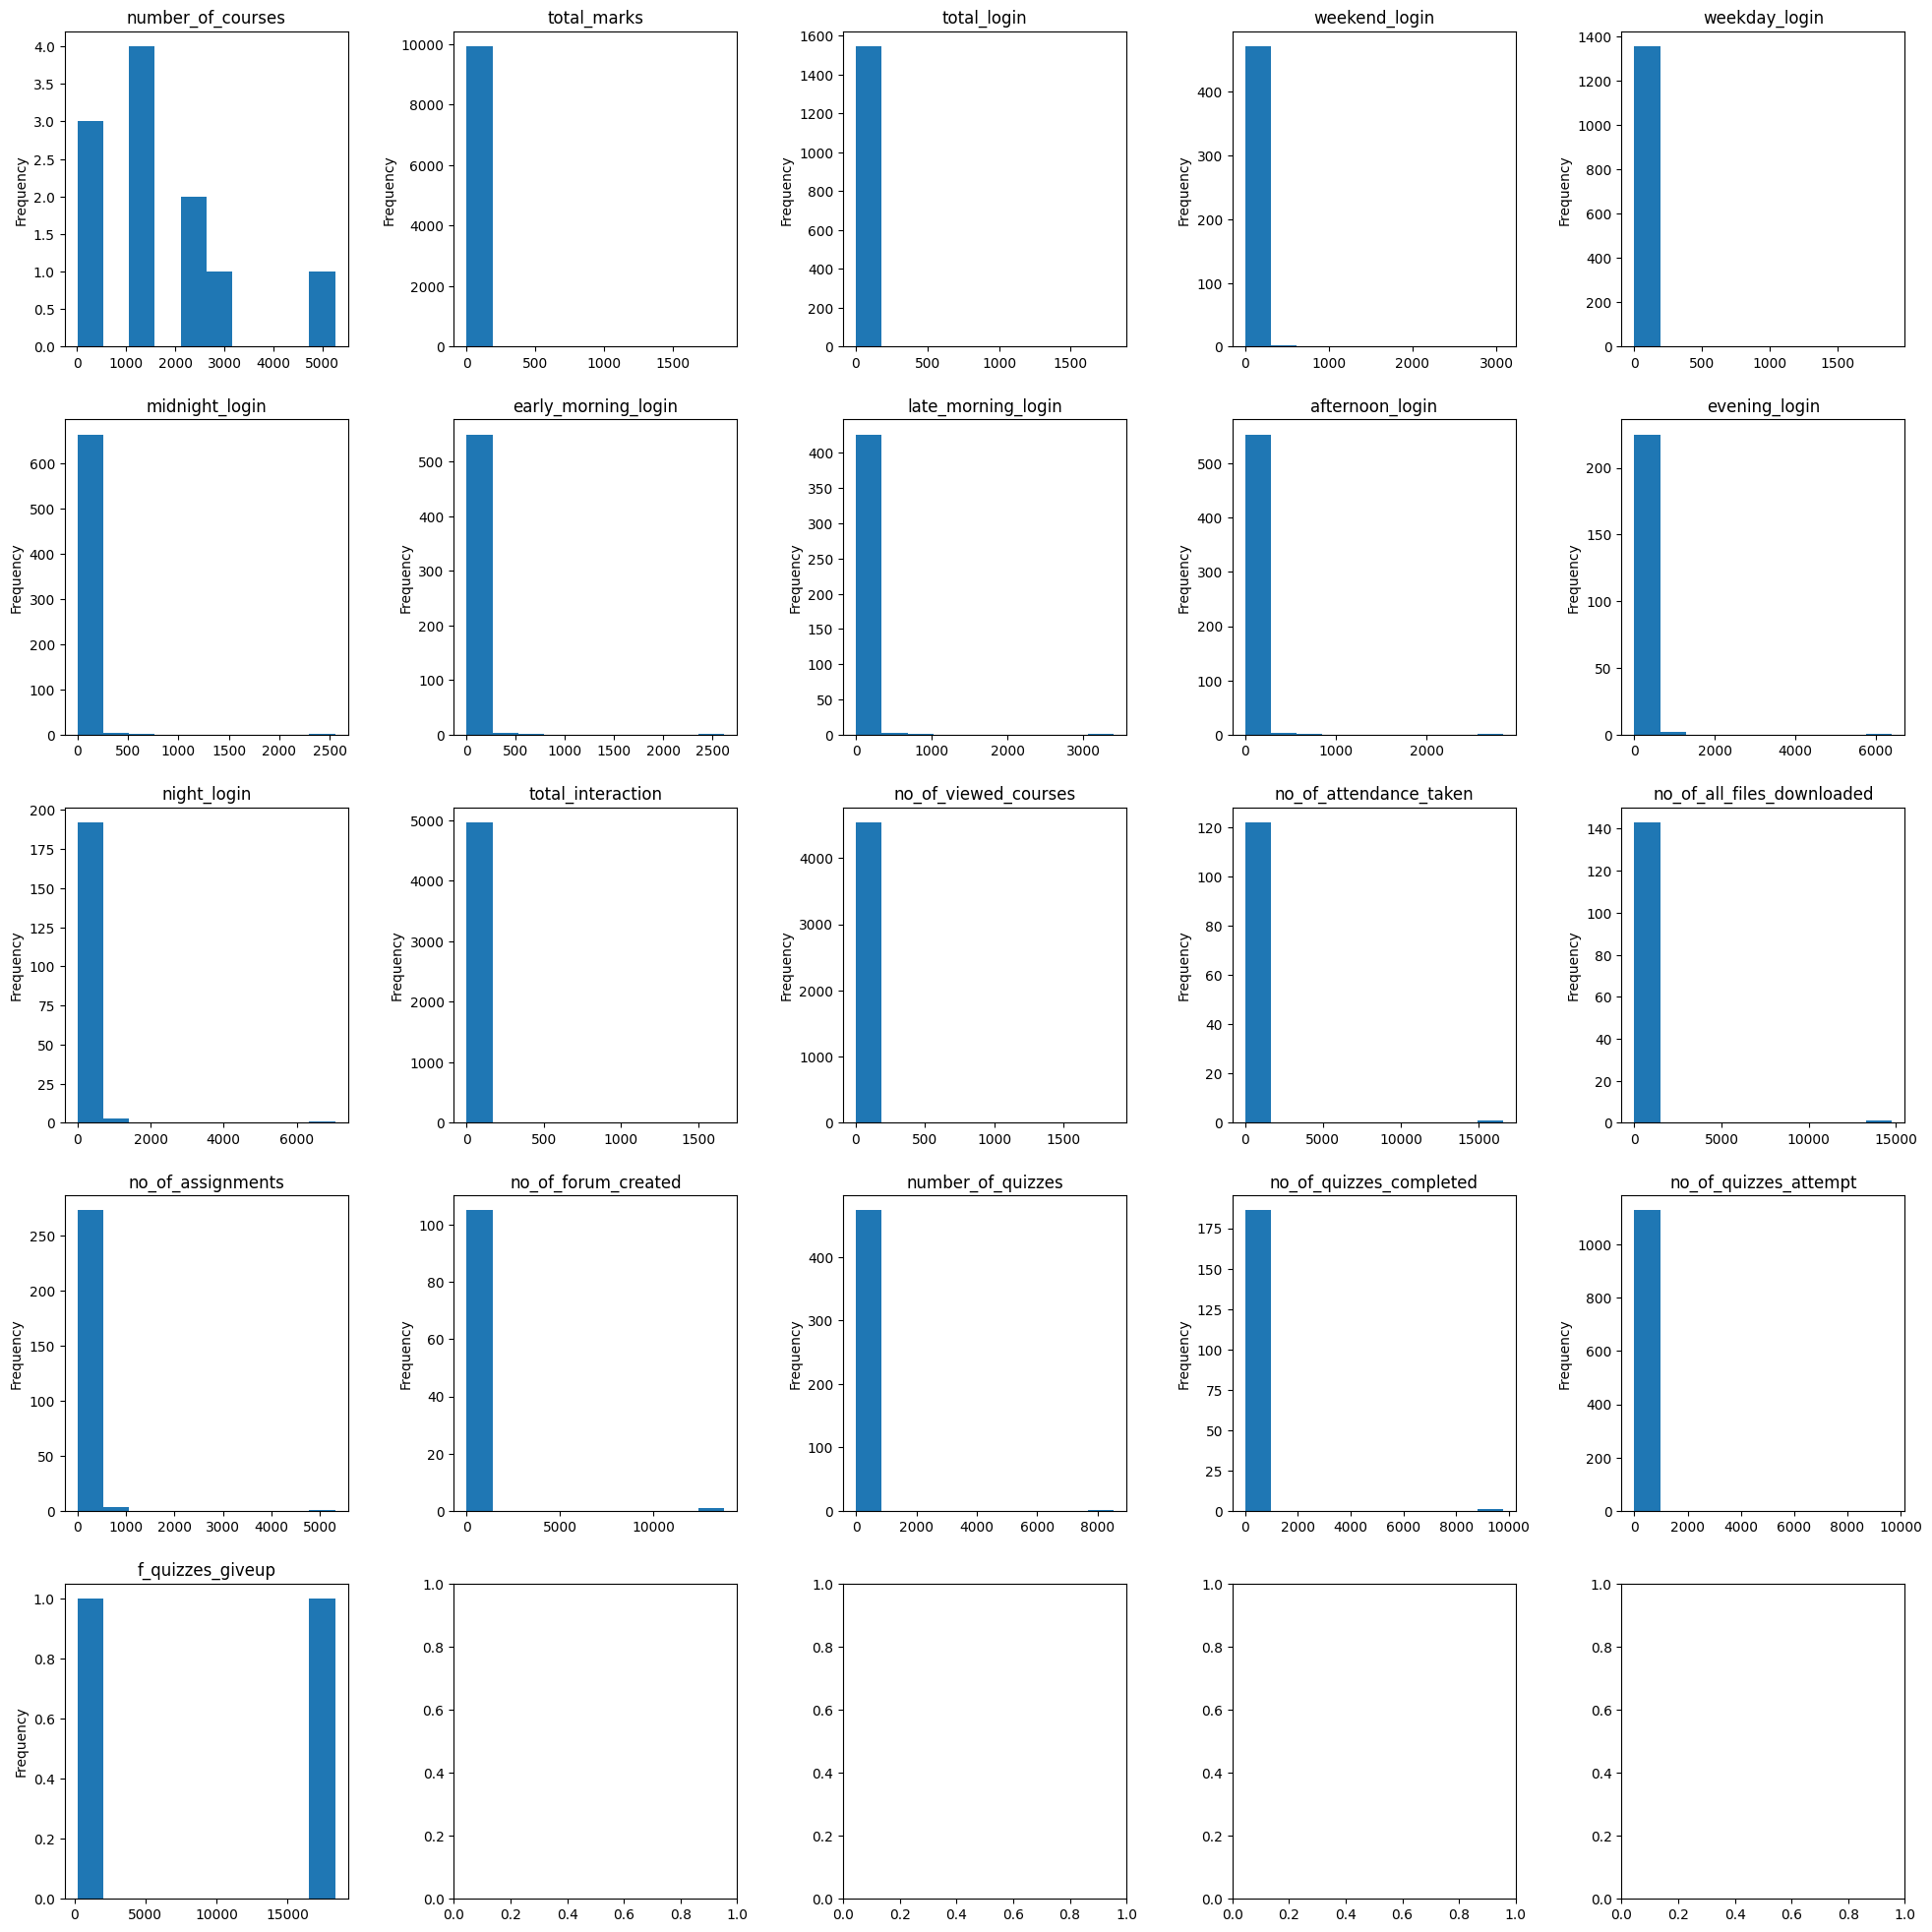

In [156]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,20))
count = 0
for col in [x for x in final_df.select_dtypes(include=["float"]).columns if x != "userid"]:
    i, j = count // 5, count % 5
    final_df[col].value_counts().plot(kind="hist", ax=axes[i, j])
    axes[i,j].set_title(col)
    count+=1
fig.tight_layout(pad=2.0)
fig.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

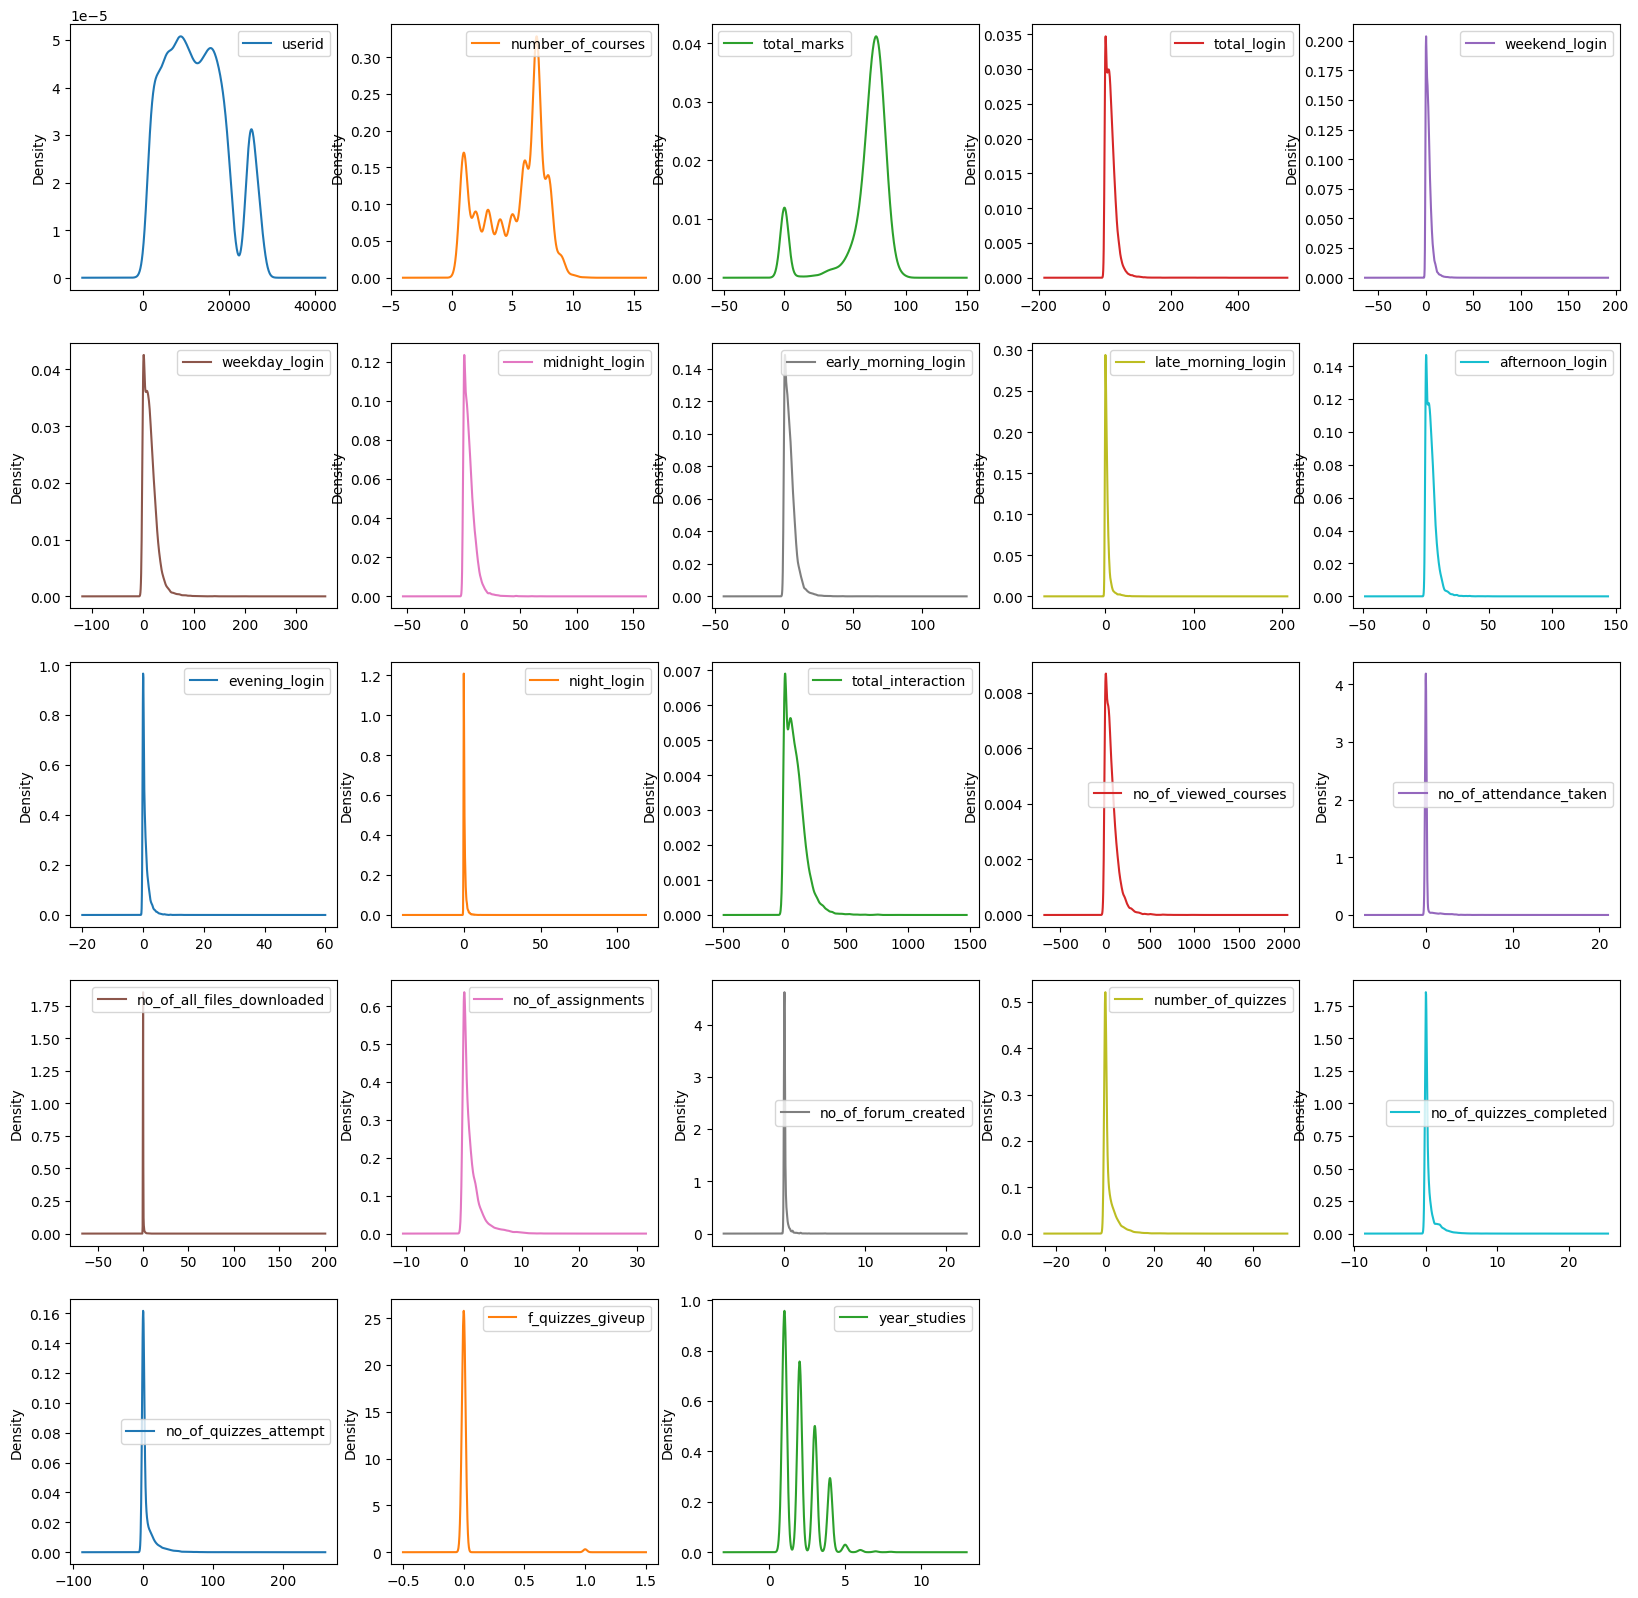

In [157]:
final_df.plot.density(subplots=True, sharex=False, sharey=False, layout=(5, 5), figsize=(20, 20))

In [158]:
for col in final_df.columns.tolist():
    print(col, final_df[col].nunique())

userid 18576
number_of_courses 11
total_marks 9925
total_login 1547
weekend_login 476
weekday_login 1358
midnight_login 670
early_morning_login 556
late_morning_login 431
afternoon_login 559
evening_login 228
night_login 196
total_interaction 4967
no_of_viewed_courses 4539
no_of_attendance_taken 123
no_of_all_files_downloaded 144
no_of_assignments 277
no_of_forum_created 106
number_of_quizzes 474
no_of_quizzes_completed 187
no_of_quizzes_attempt 1129
f_quizzes_giveup 2
gender 3
year_studies 9


In [159]:
# Check missing value
((final_df.isna().sum() / len(final_df)) * 100).sort_values(ascending=False)

userid                        0.0
number_of_courses             0.0
gender                        0.0
f_quizzes_giveup              0.0
no_of_quizzes_attempt         0.0
no_of_quizzes_completed       0.0
number_of_quizzes             0.0
no_of_forum_created           0.0
no_of_assignments             0.0
no_of_all_files_downloaded    0.0
no_of_attendance_taken        0.0
no_of_viewed_courses          0.0
total_interaction             0.0
night_login                   0.0
evening_login                 0.0
afternoon_login               0.0
late_morning_login            0.0
early_morning_login           0.0
midnight_login                0.0
weekday_login                 0.0
weekend_login                 0.0
total_login                   0.0
total_marks                   0.0
year_studies                  0.0
dtype: float64

In [160]:
# Discretize all numerical value into 3 bins
for col in [x for x in final_df.columns.tolist() if x not in ["userid", "f_quizzes_giveup", "total_marks", "gender"]]:
    final_df[col] = pd.qcut(final_df[col], q=3, precision=0, duplicates="drop")

In [162]:
# Processed total_marks into grading
def grade_map(x):
    if x >= 75:
        return "distinction"
    elif x >= 60:
        return "good"
    elif x >= 50:
        return "pass"
    else:
        return "fail"
final_df["grade"] = final_df["total_marks"].progress_apply(grade_map)
final_df = final_df.drop("total_marks", axis = 1)

100%|██████████████████████████████████████████████████████████████████████████████| 18582/18582 [00:00<00:00, 1279296.11it/s]


/var/folders/lf/klp9hl2j0zd2ypllsb82rd9w0000gn/T/ipykernel_10370/2361628606.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


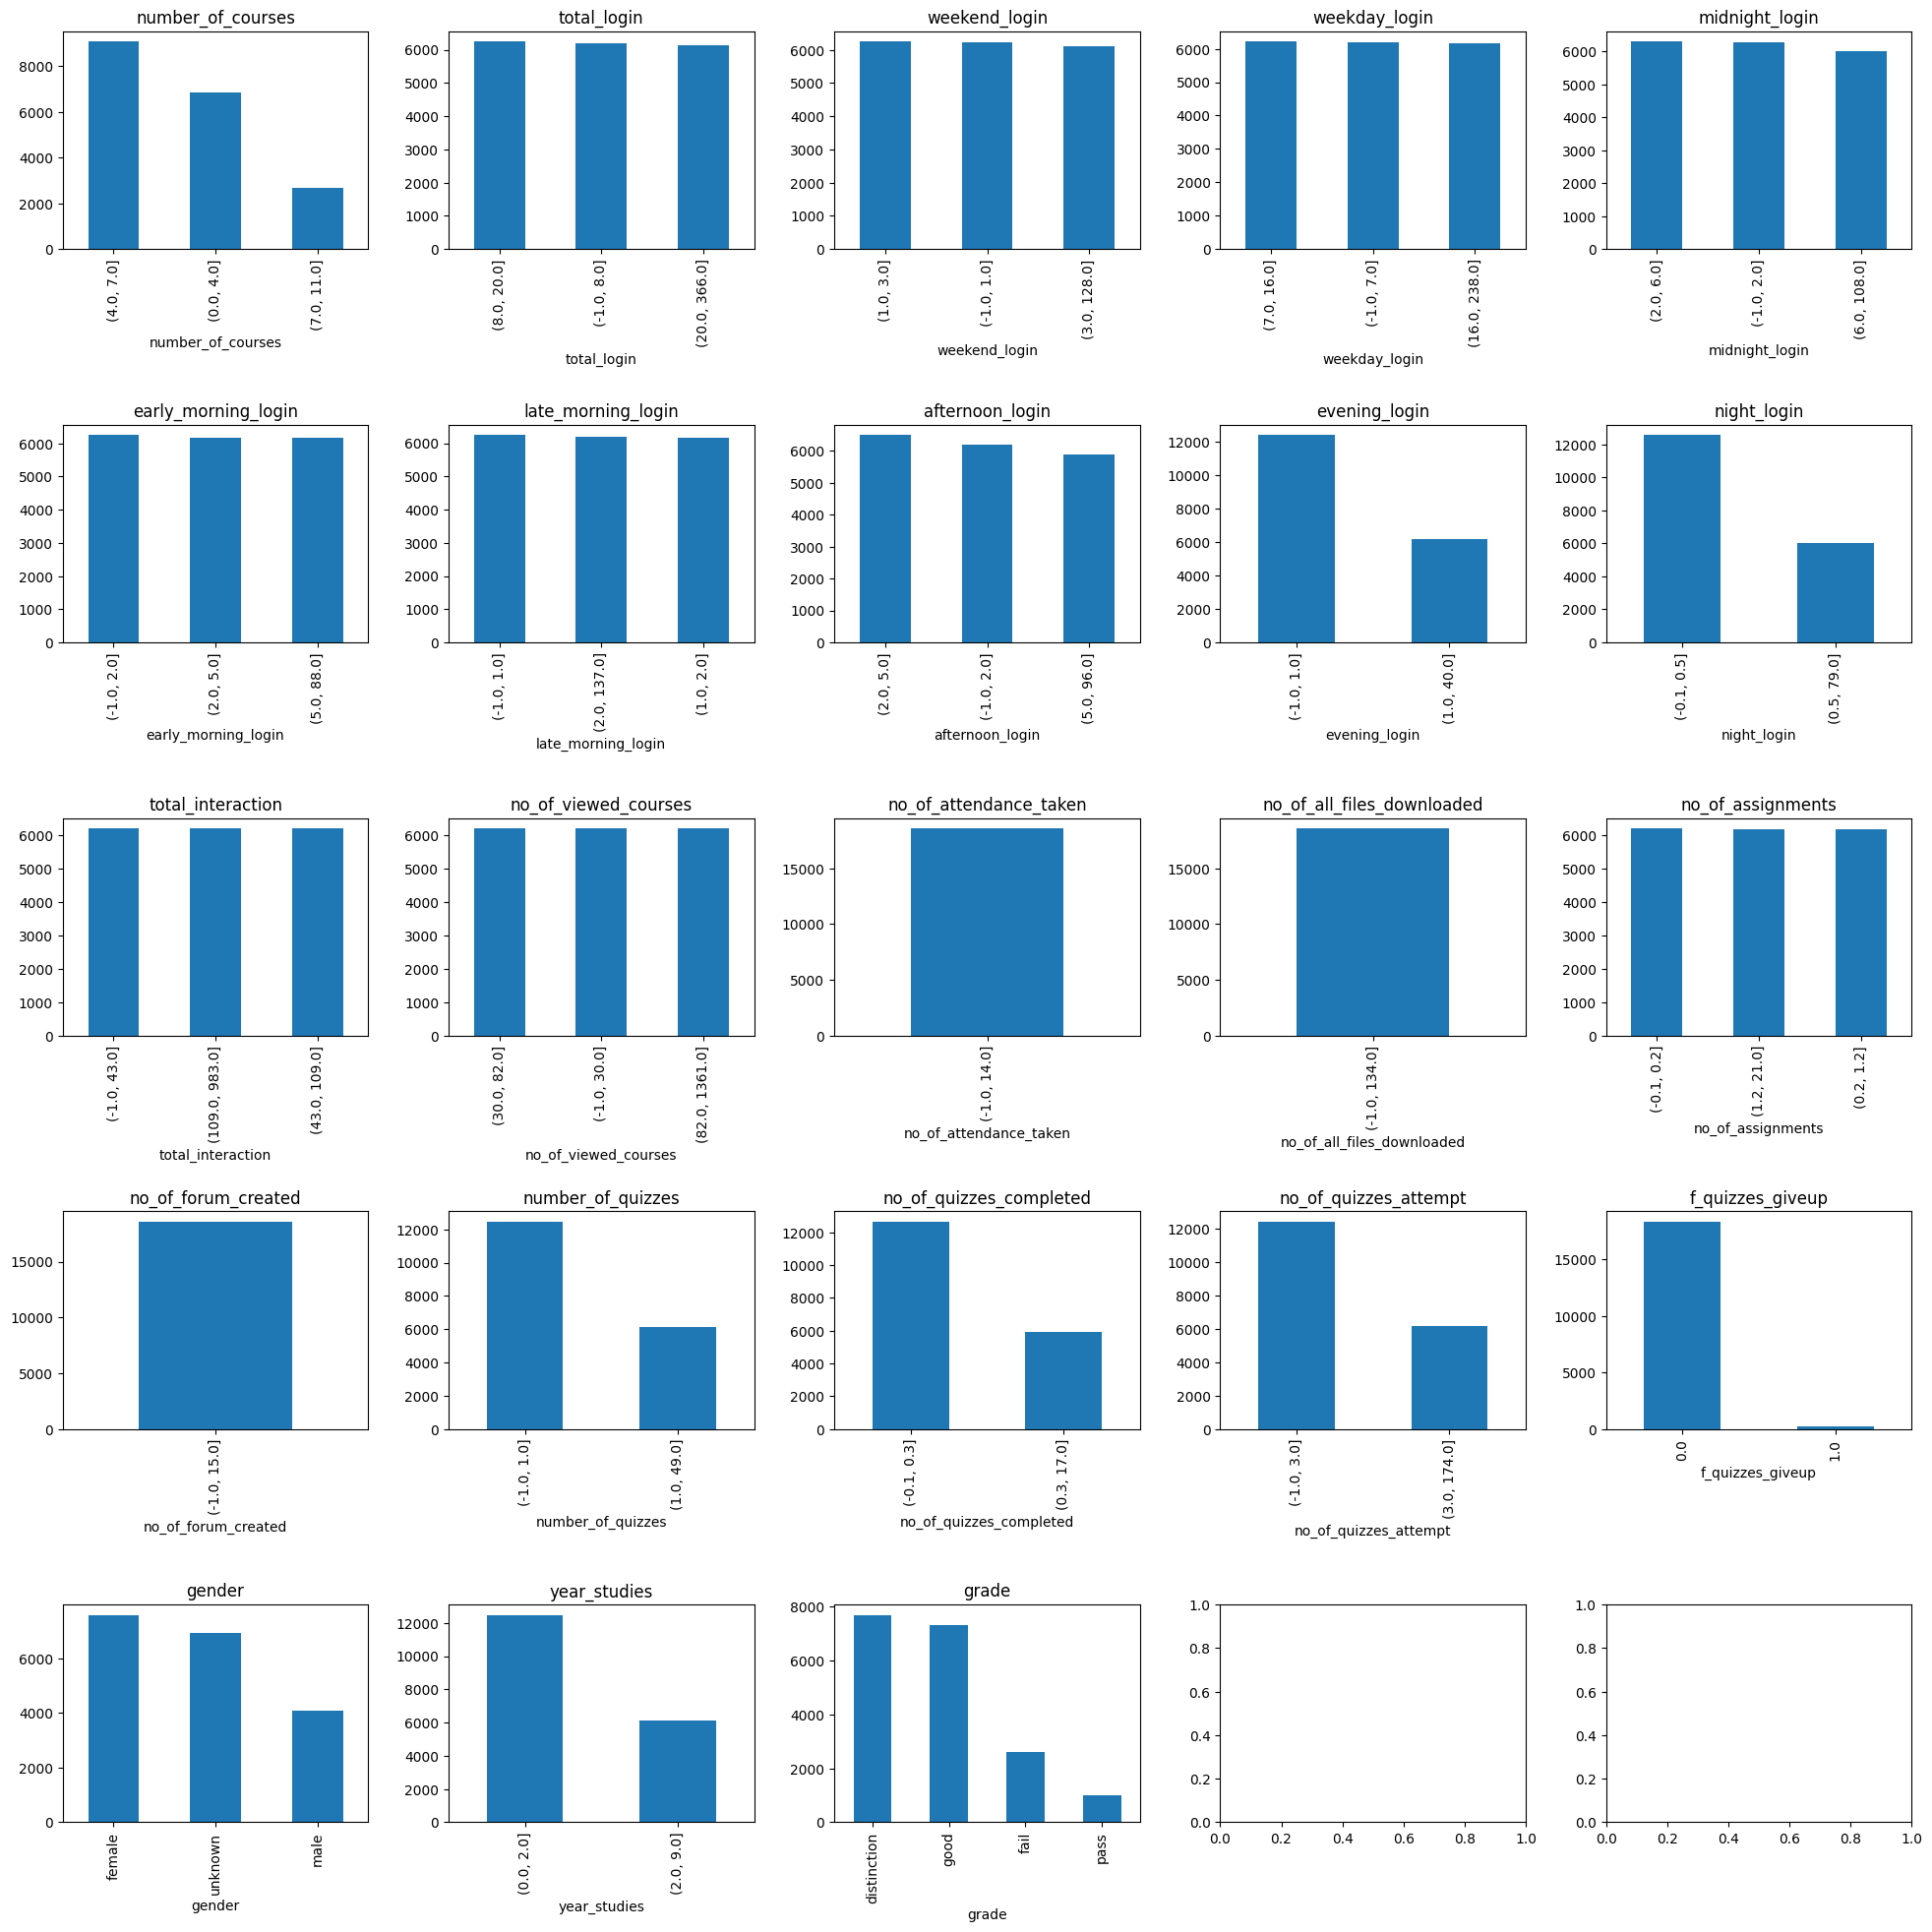

In [164]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,20))
count = 0
for col in [x for x in final_df.columns.tolist() if x not in ["userid"]]:
    i, j = count // 5, count % 5
    final_df[col].value_counts().plot(kind="bar", ax=axes[i, j])
    axes[i,j].set_title(col)
    count+=1
fig.tight_layout(pad=2.0)
fig.show()

In [165]:
# Drop column with 1 value
col_list = []
for col in final_df.columns:
    if final_df[col].nunique() == 1:
        col_list.append(col)
final_df = final_df.drop(col_list, axis = 1)

In [166]:
print("Number of column:", len(col_list))

Number of column: 3


In [167]:
final_df.to_csv("./df_for_prediction.csv", index=False)

# Prediction

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
# from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.multiclass import OneVsRestClassifier

In [169]:
final_df = pd.read_csv("./df_for_prediction.csv")

In [170]:
# Label encode
for col in final_df.select_dtypes(include="object").columns:
    final_df[col] = final_df[col].astype("category").cat.codes

In [171]:
y = final_df["grade"]
X = final_df.drop(["grade", "userid"], axis = 1)

In [205]:
def evaluate_model(X, y):
    result_list = {}
    model_list = ["CART", "RF", "XGB", "SVM", "NB", "KNN", "VS"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 22)
    for model in tqdm(model_list):
        if model == "CART":
            selected_model = DecisionTreeClassifier(random_state = 22)
        elif model == "RF":
            selected_model = RandomForestClassifier(random_state = 22)
        elif model == "XGB":
            selected_model = XGBClassifier(random_state = 22)
        elif model == "LGBM":
            # selected_model = LGBMClassifier(random_state = 22)
            pass
        elif model == "SVM":
            selected_model = SVC(random_state = 22)
        elif model == "KNN":
            knn_classifier = KNeighborsClassifier()
        elif model == "NB":
            selected_model = GaussianNB()
        elif model == "VS":
            selected_model = OneVsRestClassifier(XGBClassifier(random_state=22))
        else:
            pass
        selected_model.fit(X_train, y_train)
        y_pred = selected_model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        result_list[model] = {"acc": round(acc*100, 2)}#, "recall": round(recall, 2), "precision": round(precision, 2), "f1": round(f1, 2)}
    return result_list

In [206]:
result_list = evaluate_model(X, y)

 43%|███████████████████████████████████████                                                    | 3/7 [00:01<00:01,  2.67it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|███████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.37it/s]


In [207]:
result_list

{'CART': {'acc': 49.81},
 'RF': {'acc': 54.22},
 'XGB': {'acc': 53.61},
 'SVM': {'acc': 55.82},
 'NB': {'acc': 46.38},
 'KNN': {'acc': 46.38},
 'VS': {'acc': 53.79}}

In [211]:
result_df = pd.DataFrame(result_list)

In [212]:
result_df

,CART,RF,XGB,SVM,NB,KNN,VS
acc,49.81,54.22,53.61,55.82,46.38,46.38,53.79


### TRY PREDICTION USING NEURAL NETWORK

In [213]:
from keras.optimizers import SGD

In [214]:
def neural_network():
    nn = Sequential()
    nn.add(Dense(100, activation="relu"))
    nn.add(Dense(50, activation="relu"))
    nn.add(Dense(25, activation="relu"))
    nn.add(Dense(10, activation="relu"))
    nn.add(Dense(4, activation='softmax'))
    nn.compile(loss="categorical_crossentropy", optimizer=SGD(), metrics=["accuracy"])
    return nn

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 22)

In [216]:
y_train = to_categorical(y_train, num_classes=4)

In [217]:
selected_model = neural_network()

2023-12-10 17:18:51.264140: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-10 17:18:51.264195: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-10 17:18:51.264205: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-10 17:18:51.264288: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-10 17:18:51.264330: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [219]:
history = selected_model.fit(X_train, y_train, epochs=25, batch_size=100, verbose=1)

Epoch 1/25
38/38 [==============================] - 2s 41ms/step - loss: 1.0096 - accuracy: 0.5277
Epoch 2/25
38/38 [==============================] - 2s 41ms/step - loss: 1.0080 - accuracy: 0.5248
Epoch 3/25
38/38 [==============================] - 2s 40ms/step - loss: 1.0066 - accuracy: 0.5296
Epoch 4/25
38/38 [==============================] - 2s 40ms/step - loss: 1.0063 - accuracy: 0.5264
Epoch 5/25
38/38 [==============================] - 2s 41ms/step - loss: 1.0040 - accuracy: 0.5291
Epoch 6/25
38/38 [==============================] - 2s 40ms/step - loss: 1.0028 - accuracy: 0.5277
Epoch 7/25
38/38 [==============================] - 2s 41ms/step - loss: 1.0019 - accuracy: 0.5309
Epoch 8/25
38/38 [==============================] - 1s 38ms/step - loss: 1.0005 - accuracy: 0.5277
Epoch 9/25
38/38 [==============================] - 2s 40ms/step - loss: 1.0001 - accuracy: 0.5240
Epoch 10/25
38/38 [==============================] - 1s 39ms/step - loss: 0.9994 - accuracy: 0.5299
Epoch 11/

In [221]:
selected_model.evaluate(X_test, to_categorical(y_test, num_classes=4))

2023-12-10 17:21:40.380897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


465/465 [==============================] - 18s 38ms/step - loss: 0.9926 - accuracy: 0.5184


[0.9925671815872192, 0.5184313058853149]

### SHAP VALUE

In [222]:
import shap

In [223]:
# Use XGB Model
selected_model = XGBClassifier(random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)
selected_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [224]:
y_pred = selected_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5579768630616089

In [225]:
explainer = shap.TreeExplainer(selected_model)
shap_values = explainer.shap_values(X)

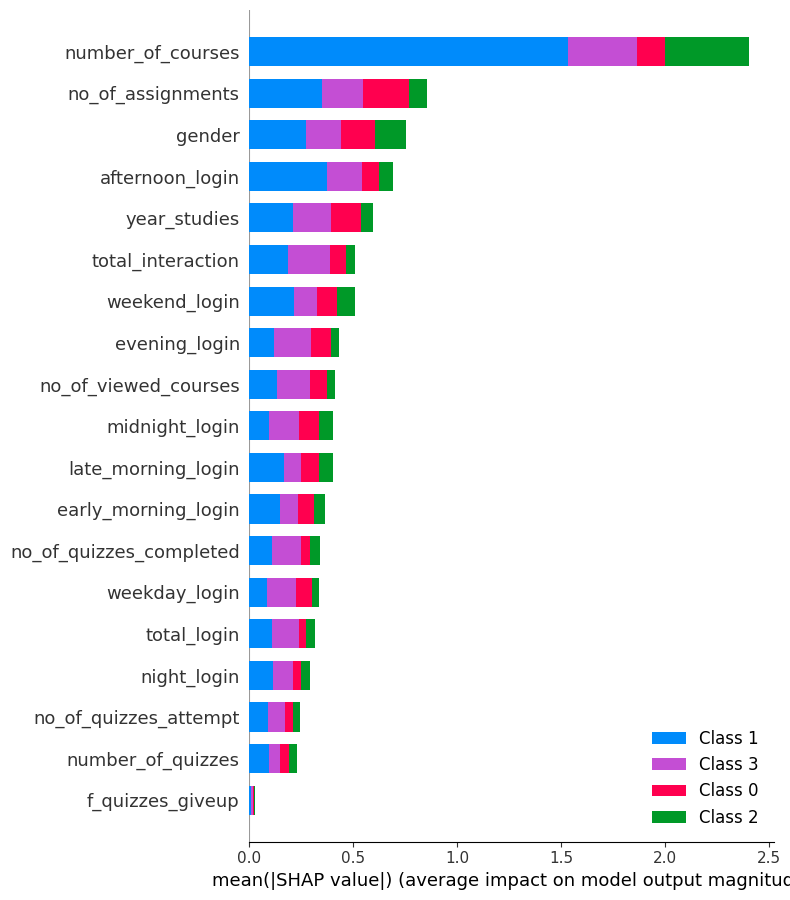

In [226]:
shap.summary_plot(shap_values, X, plot_type="bar")

# SWITCH TO BINARY PREDICTION

In [231]:
final_df = pd.read_csv("./df_for_prediction.csv")

In [234]:
final_df.grade.value_counts()

grade
distinction    7678
good           7309
fail           2589
pass           1006
Name: count, dtype: int64

In [237]:
final_df["new_grade"] = final_df["grade"].progress_apply(lambda x: 1 if x == "distinction" or x == "good" else 0)

100%|██████████████████████████████████████████████████████████████████████████████| 18582/18582 [00:00<00:00, 1014138.30it/s]


In [240]:
final_df = final_df.drop("grade", axis = 1)

In [241]:
# Label encode
for col in final_df.select_dtypes(include="object").columns:
    final_df[col] = final_df[col].astype("category").cat.codes

In [242]:
y = final_df["new_grade"]
X = final_df.drop(["new_grade", "userid"], axis = 1)

In [246]:
def evaluate_model(X, y):
    result_list = {}
    model_list = ["CART", "RF", "XGB", "SVM", "NB", "KNN", "VS"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 22)
    for model in tqdm(model_list):
        if model == "CART":
            selected_model = DecisionTreeClassifier(random_state = 22)
        elif model == "RF":
            selected_model = RandomForestClassifier(random_state = 22)
        elif model == "XGB":
            selected_model = XGBClassifier(random_state = 22)
        elif model == "LGBM":
            # selected_model = LGBMClassifier(random_state = 22)
            pass
        elif model == "SVM":
            selected_model = SVC(random_state = 22)
        elif model == "KNN":
            knn_classifier = KNeighborsClassifier()
        elif model == "NB":
            selected_model = GaussianNB()
        elif model == "VS":
            selected_model = OneVsRestClassifier(XGBClassifier(random_state=22))
        else:
            pass
        selected_model.fit(X_train, y_train)
        y_pred = selected_model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        result_list[model] = {"acc": round(acc*100, 2), "recall": round(recall, 2), "precision": round(precision, 2), "f1": round(f1, 2)}
    return result_list

In [247]:
result_list = evaluate_model(X, y)

100%|███████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.25it/s]


In [248]:
result_list

{'CART': {'acc': 80.1, 'recall': 0.87, 'precision': 0.88, 'f1': 0.88},
 'RF': {'acc': 85.97, 'recall': 0.96, 'precision': 0.88, 'f1': 0.92},
 'XGB': {'acc': 85.32, 'recall': 0.94, 'precision': 0.88, 'f1': 0.91},
 'SVM': {'acc': 86.71, 'recall': 0.97, 'precision': 0.88, 'f1': 0.92},
 'NB': {'acc': 73.54, 'recall': 0.76, 'precision': 0.9, 'f1': 0.82},
 'KNN': {'acc': 73.54, 'recall': 0.76, 'precision': 0.9, 'f1': 0.82},
 'VS': {'acc': 85.32, 'recall': 0.94, 'precision': 0.88, 'f1': 0.91}}

In [249]:
result_df = pd.DataFrame(result_list)

In [250]:
result_df

,CART,RF,XGB,SVM,NB,KNN,VS
acc,80.10,85.97,85.32,86.71,73.54,73.54,85.32
recall,0.87,0.96,0.94,0.97,0.76,0.76,0.94
precision,0.88,0.88,0.88,0.88,0.90,0.90,0.88
f1,0.88,0.92,0.91,0.92,0.82,0.82,0.91


In [252]:
final_df.new_grade.value_counts()

new_grade
1    14987
0     3595
Name: count, dtype: int64

In [253]:
pd.read_csv("./df_for_prediction.csv").grade.value_counts()

grade
distinction    7678
good           7309
fail           2589
pass           1006
Name: count, dtype: int64

# UNDERSAMPLING

In [254]:
final_df = pd.read_csv("./df_for_prediction.csv")

In [255]:
final_df.grade.value_counts()

grade
distinction    7678
good           7309
fail           2589
pass           1006
Name: count, dtype: int64

In [256]:
final_df["new_grade"] = final_df["grade"].progress_apply(lambda x: 1 if x == "distinction" or x == "good" else 0)

100%|██████████████████████████████████████████████████████████████████████████████| 18582/18582 [00:00<00:00, 1399758.57it/s]


In [261]:
# Undersample
sample_value = final_df.new_grade.value_counts().tail(1).values[0]
true_df = final_df[final_df.new_grade == 1].sample(sample_value)
final_df = pd.concat([true_df, final_df[final_df.new_grade == 0]])

In [265]:
final_df = final_df.drop("grade", axis = 1)

In [266]:
# Label encode
for col in final_df.select_dtypes(include="object").columns:
    final_df[col] = final_df[col].astype("category").cat.codes

In [267]:
y = final_df["new_grade"]
X = final_df.drop(["new_grade", "userid"], axis = 1)

In [268]:
result_list = evaluate_model(X, y)

100%|█| 7/7 [00:00<0


In [269]:
result_list

{'CART': {'acc': 71.78, 'recall': 0.67, 'precision': 0.74, 'f1': 0.7},
 'RF': {'acc': 75.87, 'recall': 0.77, 'precision': 0.75, 'f1': 0.76},
 'XGB': {'acc': 74.22, 'recall': 0.73, 'precision': 0.74, 'f1': 0.74},
 'SVM': {'acc': 77.42, 'recall': 0.81, 'precision': 0.75, 'f1': 0.78},
 'NB': {'acc': 69.3, 'recall': 0.71, 'precision': 0.68, 'f1': 0.7},
 'KNN': {'acc': 69.3, 'recall': 0.71, 'precision': 0.68, 'f1': 0.7},
 'VS': {'acc': 74.22, 'recall': 0.73, 'precision': 0.74, 'f1': 0.74}}

In [270]:
result_df = pd.DataFrame(result_list)

In [271]:
result_df

,CART,RF,XGB,SVM,NB,KNN,VS
acc,71.78,75.87,74.22,77.42,69.30,69.30,74.22
recall,0.67,0.77,0.73,0.81,0.71,0.71,0.73
precision,0.74,0.75,0.74,0.75,0.68,0.68,0.74
f1,0.70,0.76,0.74,0.78,0.70,0.70,0.74


# OVERSAMPLING

In [275]:
from imblearn.over_sampling import RandomOverSampler

In [277]:
final_df = pd.read_csv("./df_for_prediction.csv")

In [278]:
final_df.grade.value_counts()

grade
distinction    7678
good           7309
fail           2589
pass           1006
Name: count, dtype: int64

In [279]:
final_df["new_grade"] = final_df["grade"].progress_apply(lambda x: 1 if x == "distinction" or x == "good" else 0)

100%|█| 18582/18582 


In [280]:
final_df = final_df.drop("grade", axis = 1)

In [281]:
# Label encode
for col in final_df.select_dtypes(include="object").columns:
    final_df[col] = final_df[col].astype("category").cat.codes

In [282]:
y = final_df["new_grade"]
X = final_df.drop(["new_grade", "userid"], axis = 1)

In [283]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [284]:
X_over, y_over = oversample.fit_resample(X, y)

In [286]:
final_df.new_grade.value_counts()

new_grade
1    14987
0     3595
Name: count, dtype: int64

In [285]:
y_over.value_counts()

new_grade
1    14987
0    14987
Name: count, dtype: int64

In [287]:
result_list = evaluate_model(X_over, y_over)

100%|█| 7/7 [00:06<0


In [288]:
result_list

{'CART': {'acc': 77.6, 'recall': 0.69, 'precision': 0.83, 'f1': 0.76},
 'RF': {'acc': 81.76, 'recall': 0.78, 'precision': 0.84, 'f1': 0.81},
 'XGB': {'acc': 80.67, 'recall': 0.78, 'precision': 0.83, 'f1': 0.8},
 'SVM': {'acc': 77.64, 'recall': 0.77, 'precision': 0.78, 'f1': 0.78},
 'NB': {'acc': 69.95, 'recall': 0.72, 'precision': 0.69, 'f1': 0.71},
 'KNN': {'acc': 69.95, 'recall': 0.72, 'precision': 0.69, 'f1': 0.71},
 'VS': {'acc': 80.67, 'recall': 0.78, 'precision': 0.83, 'f1': 0.8}}

In [289]:
result_df = pd.DataFrame(result_list)

In [290]:
result_df

,CART,RF,XGB,SVM,NB,KNN,VS
acc,77.60,81.76,80.67,77.64,69.95,69.95,80.67
recall,0.69,0.78,0.78,0.77,0.72,0.72,0.78
precision,0.83,0.84,0.83,0.78,0.69,0.69,0.83
f1,0.76,0.81,0.80,0.78,0.71,0.71,0.80


# Compare with Distinction & Good & Pass vs Fail

In [291]:
final_df = pd.read_csv("./df_for_prediction.csv")

In [292]:
final_df.grade.value_counts()

grade
distinction    7678
good           7309
fail           2589
pass           1006
Name: count, dtype: int64

In [293]:
final_df["new_grade"] = final_df["grade"].progress_apply(lambda x: 0 if x == "fail" else 1)

100%|█| 18582/18582 


In [294]:
final_df = final_df.drop("grade", axis = 1)

In [295]:
# Label encode
for col in final_df.select_dtypes(include="object").columns:
    final_df[col] = final_df[col].astype("category").cat.codes

In [296]:
y = final_df["new_grade"]
X = final_df.drop(["new_grade", "userid"], axis = 1)

In [297]:
result_list = evaluate_model(X, y)

100%|█| 7/7 [00:01<0


In [298]:
result_list

{'CART': {'acc': 88.23, 'recall': 0.93, 'precision': 0.93, 'f1': 0.93},
 'RF': {'acc': 90.78, 'recall': 0.97, 'precision': 0.93, 'f1': 0.95},
 'XGB': {'acc': 90.32, 'recall': 0.96, 'precision': 0.93, 'f1': 0.94},
 'SVM': {'acc': 90.95, 'recall': 0.97, 'precision': 0.93, 'f1': 0.95},
 'NB': {'acc': 80.75, 'recall': 0.81, 'precision': 0.96, 'f1': 0.88},
 'KNN': {'acc': 80.75, 'recall': 0.81, 'precision': 0.96, 'f1': 0.88},
 'VS': {'acc': 90.32, 'recall': 0.96, 'precision': 0.93, 'f1': 0.94}}

In [299]:
result_df = pd.DataFrame(result_list)

In [300]:
result_df

,CART,RF,XGB,SVM,NB,KNN,VS
acc,88.23,90.78,90.32,90.95,80.75,80.75,90.32
recall,0.93,0.97,0.96,0.97,0.81,0.81,0.96
precision,0.93,0.93,0.93,0.93,0.96,0.96,0.93
f1,0.93,0.95,0.94,0.95,0.88,0.88,0.94


# UNDERSAMPLING

In [301]:
final_df = pd.read_csv("./df_for_prediction.csv")

In [302]:
final_df.grade.value_counts()

grade
distinction    7678
good           7309
fail           2589
pass           1006
Name: count, dtype: int64

In [303]:
final_df["new_grade"] = final_df["grade"].progress_apply(lambda x: 0 if x == "fail" else 1)

100%|█| 18582/18582 


In [304]:
# Undersample
sample_value = final_df.new_grade.value_counts().tail(1).values[0]
true_df = final_df[final_df.new_grade == 1].sample(sample_value)
final_df = pd.concat([true_df, final_df[final_df.new_grade == 0]])

In [305]:
final_df = final_df.drop("grade", axis = 1)

In [306]:
# Label encode
for col in final_df.select_dtypes(include="object").columns:
    final_df[col] = final_df[col].astype("category").cat.codes

In [307]:
y = final_df["new_grade"]
X = final_df.drop(["new_grade", "userid"], axis = 1)

In [308]:
result_list = evaluate_model(X, y)

100%|█| 7/7 [00:00<0


In [309]:
result_list

{'CART': {'acc': 78.69, 'recall': 0.74, 'precision': 0.81, 'f1': 0.78},
 'RF': {'acc': 83.1, 'recall': 0.81, 'precision': 0.85, 'f1': 0.83},
 'XGB': {'acc': 83.15, 'recall': 0.81, 'precision': 0.85, 'f1': 0.83},
 'SVM': {'acc': 84.14, 'recall': 0.82, 'precision': 0.85, 'f1': 0.84},
 'NB': {'acc': 79.82, 'recall': 0.79, 'precision': 0.81, 'f1': 0.8},
 'KNN': {'acc': 79.82, 'recall': 0.79, 'precision': 0.81, 'f1': 0.8},
 'VS': {'acc': 83.15, 'recall': 0.81, 'precision': 0.85, 'f1': 0.83}}

In [310]:
result_df = pd.DataFrame(result_list)

In [311]:
result_df

,CART,RF,XGB,SVM,NB,KNN,VS
acc,78.69,83.10,83.15,84.14,79.82,79.82,83.15
recall,0.74,0.81,0.81,0.82,0.79,0.79,0.81
precision,0.81,0.85,0.85,0.85,0.81,0.81,0.85
f1,0.78,0.83,0.83,0.84,0.80,0.80,0.83


# OVERSAMPLING

In [312]:
from imblearn.over_sampling import RandomOverSampler

In [313]:
final_df = pd.read_csv("./df_for_prediction.csv")

In [314]:
final_df.grade.value_counts()

grade
distinction    7678
good           7309
fail           2589
pass           1006
Name: count, dtype: int64

In [316]:
final_df["new_grade"] = final_df["grade"].progress_apply(lambda x: 0 if x == "fail" else 1)

100%|█| 18582/18582 


In [317]:
final_df = final_df.drop("grade", axis = 1)

In [318]:
# Label encode
for col in final_df.select_dtypes(include="object").columns:
    final_df[col] = final_df[col].astype("category").cat.codes

In [319]:
y = final_df["new_grade"]
X = final_df.drop(["new_grade", "userid"], axis = 1)

In [320]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [321]:
X_over, y_over = oversample.fit_resample(X, y)

In [322]:
final_df.new_grade.value_counts()

new_grade
1    15993
0     2589
Name: count, dtype: int64

In [323]:
y_over.value_counts()

new_grade
1    15993
0    15993
Name: count, dtype: int64

In [324]:
result_list = evaluate_model(X_over, y_over)

100%|█| 7/7 [00:05<0


In [325]:
result_list

{'CART': {'acc': 86.48, 'recall': 0.8, 'precision': 0.92, 'f1': 0.86},
 'RF': {'acc': 89.03, 'recall': 0.85, 'precision': 0.93, 'f1': 0.89},
 'XGB': {'acc': 88.3, 'recall': 0.85, 'precision': 0.91, 'f1': 0.88},
 'SVM': {'acc': 85.53, 'recall': 0.85, 'precision': 0.86, 'f1': 0.85},
 'NB': {'acc': 79.72, 'recall': 0.79, 'precision': 0.8, 'f1': 0.8},
 'KNN': {'acc': 79.72, 'recall': 0.79, 'precision': 0.8, 'f1': 0.8},
 'VS': {'acc': 88.3, 'recall': 0.85, 'precision': 0.91, 'f1': 0.88}}

In [326]:
result_df = pd.DataFrame(result_list)

In [327]:
result_df

,CART,RF,XGB,SVM,NB,KNN,VS
acc,86.48,89.03,88.30,85.53,79.72,79.72,88.30
recall,0.80,0.85,0.85,0.85,0.79,0.79,0.85
precision,0.92,0.93,0.91,0.86,0.80,0.80,0.91
f1,0.86,0.89,0.88,0.85,0.80,0.80,0.88
